<a href="https://colab.research.google.com/github/NikunjRathod200/Machine-Learning/blob/main/house_price_pridicition_Regression_Seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Regression

In [ ]:
import pandas as pd

In [ ]:
housedata= pd.read_csv("https://raw.githubusercontent.com/YBI-Foundation/Dataset/main/House%20Prices.csv")

In [ ]:
housedata.head()

,ID,Date,Price,Bedrooms,Bathrooms,Sqft_living,Sqft_lot,Floors,Waterfront,View,...,Grade,Sqft_above,Sqft_basement,Yr_built,Yr_renovated,zipcode,Lat,Long,Sqft_living15,Sqft_lot15
0,1,20140916T000000,280000.0,6,3.00,2400,9373,2.0,0,0,...,7,2400,0,1991,0,98002,47.3262,-122.214,2060,7316
1,2,20150422T000000,300000.0,6,3.00,2400,9373,2.0,0,0,...,7,2400,0,1991,0,98002,47.3262,-122.214,2060,7316
2,3,20140508T000000,647500.0,4,1.75,2060,26036,1.0,0,0,...,8,1160,900,1947,0,98166,47.4444,-122.351,2590,21891
3,4,20140811T000000,400000.0,3,1.00,1460,43000,1.0,0,0,...,7,1460,0,1952,0,98166,47.4434,-122.347,2250,20023
4,5,20150401T000000,235000.0,3,1.00,1430,7599,1.5,0,0,...,6,1010,420,1930,0,98168,47.4783,-122.265,1290,10320


In [ ]:
housedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             21613 non-null  int64  
 1   Date           21613 non-null  object 
 2   Price          21613 non-null  float64
 3   Bedrooms       21613 non-null  int64  
 4   Bathrooms      21613 non-null  float64
 5   Sqft_living    21613 non-null  int64  
 6   Sqft_lot       21613 non-null  int64  
 7   Floors         21613 non-null  float64
 8   Waterfront     21613 non-null  int64  
 9   View           21613 non-null  int64  
 10  Condition      21613 non-null  int64  
 11  Grade          21613 non-null  int64  
 12  Sqft_above     21613 non-null  int64  
 13  Sqft_basement  21613 non-null  int64  
 14  Yr_built       21613 non-null  int64  
 15  Yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  Lat            21613 non-null  float64
 18  Long  

In [ ]:
housedata.columns

Index(['ID', 'Date', 'Price', 'Bedrooms', 'Bathrooms', 'Sqft_living',
       'Sqft_lot', 'Floors', 'Waterfront', 'View', 'Condition', 'Grade',
       'Sqft_above', 'Sqft_basement', 'Yr_built', 'Yr_renovated', 'zipcode',
       'Lat', 'Long', 'Sqft_living15', 'Sqft_lot15'],
      dtype='object')

In [ ]:
y= housedata['Price']

In [ ]:
X= housedata[['Bedrooms', 'Sqft_living',
       'Sqft_lot']]

In [ ]:
X.shape

(21613, 3)

In [ ]:
import seaborn as sns

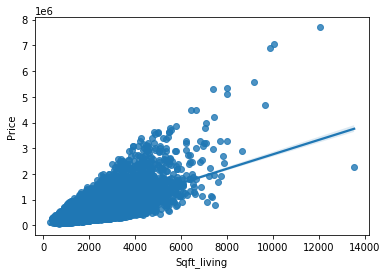

In [ ]:
sns.regplot(x= 'Sqft_living', y= 'Price', data= housedata)

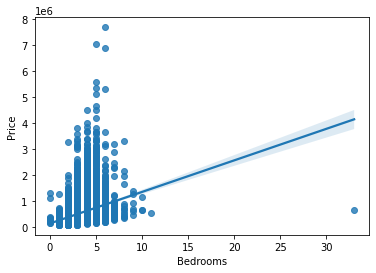

In [ ]:
sns.regplot(x= 'Bedrooms', y= 'Price', data= housedata)

In [ ]:
from sklearn.model_selection import train_test_split as tts

In [ ]:
X_train , X_test, y_train, y_test = tts(X, y ,train_size= 0.8, random_state=2529)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
mm = MinMaxScaler()

In [ ]:
X_train = mm.fit_transform(X_train)

In [ ]:
X_test = mm.fit_transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
X.columns

Index(['Bedrooms', 'Sqft_living', 'Sqft_lot'], dtype='object')

In [ ]:
lr.coef_

array([-1821094.2156211 ,  4117038.95103014,  -606029.61370199])

In [ ]:
lr.intercept_

174127.10539507907

In [ ]:
y_pred= lr.predict(X_test)

In [ ]:
y_pred.shape

(4323,)

In [ ]:
y_pred

array([ -43773.71739068, -166119.95890767,  -63272.05381324, ...,
        224549.09160977,  244403.79034394,  112564.74473043])

In [ ]:
y_test

6457     325000.0
15556    207000.0
5595     473000.0
2476     370000.0
13548    359000.0
           ...   
2036     760000.0
9517     230000.0
13812    500000.0
18902    324950.0
10472    255500.0
Name: Price, Length: 4323, dtype: float64

In [ ]:
import statsmodels.api as sm
X = sm.add_constant(X)
model = sm.OLS(y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.509
Model:                            OLS   Adj. R-squared:                  0.509
Method:                 Least Squares   F-statistic:                     7455.
Date:                Thu, 28 Jul 2022   Prob (F-statistic):               0.00
Time:                        10:18:32   Log-Likelihood:            -2.9994e+05
No. Observations:               21613   AIC:                         5.999e+05
Df Residuals:                   21609   BIC:                         5.999e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         8.26e+04   6607.620     12.500      

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
